# Using the WALRUS remotebmi container

Note that the paths need to be fully resolved, also inside the config file.

In [2]:
import remotebmi

model = remotebmi.BmiClientDocker(
    'ewatercycle-walrus',
    work_dir="/tmp",
    input_dirs=['/home/bart/git/ewatercycle-walrus/example'],
)

model.initialize("/home/bart/git/ewatercycle-walrus/example/walrus.yml")

Test if the communication works by asking the component name:

In [4]:
model.get_component_name()

'WALRUS'

Update the model so we can read the discarge

In [5]:
model.update()

Retrieve the discarge and plot it:

In [8]:
import numpy as np

discharge = []

while model.get_current_time() < model.get_end_time():
    discharge.append(
        model.get_value("Q", np.array([0.]))
    )
    model.update()

Text(0.5, 0, 'Time (hours)')

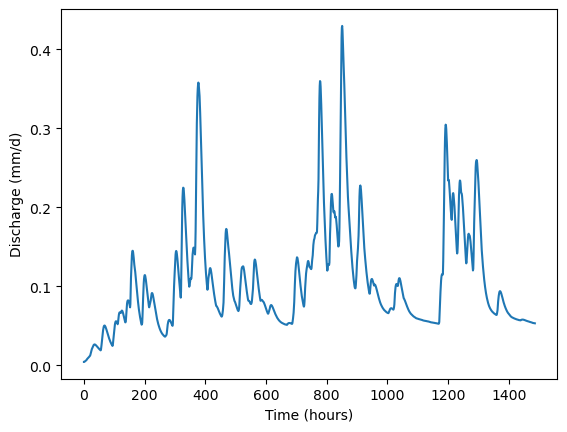

In [15]:
import matplotlib.pyplot as plt

plt.plot(np.array(discharge))
plt.ylabel("Discharge (mm/d)")
plt.xlabel("Time (hours)")

Deleting the model *should* kill the container (but doesn't seem to)

In [16]:
del model